<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Estudo_Ibov_%26_Dolar_Correl%C3%A7%C3%B5es_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# O Pyfolio está apresentado erro com a versão 1.0 do Pandas por isso acrescentei esse código para que o Google Colab use a versão anterior. Será necessário o restart da Runtime.
!pip install pandas==0.25.3

In [0]:
# Conferindo a versão do Pandas que está sendo usada
import pandas as pd
pd.__version__

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as wb

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


In [0]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [0]:
#Obtendo oa dados do mercado.
bova11 = wb.get_data_yahoo("BOVA11.SA") #start="2018-01-01", and="2019-01-01")
bova11

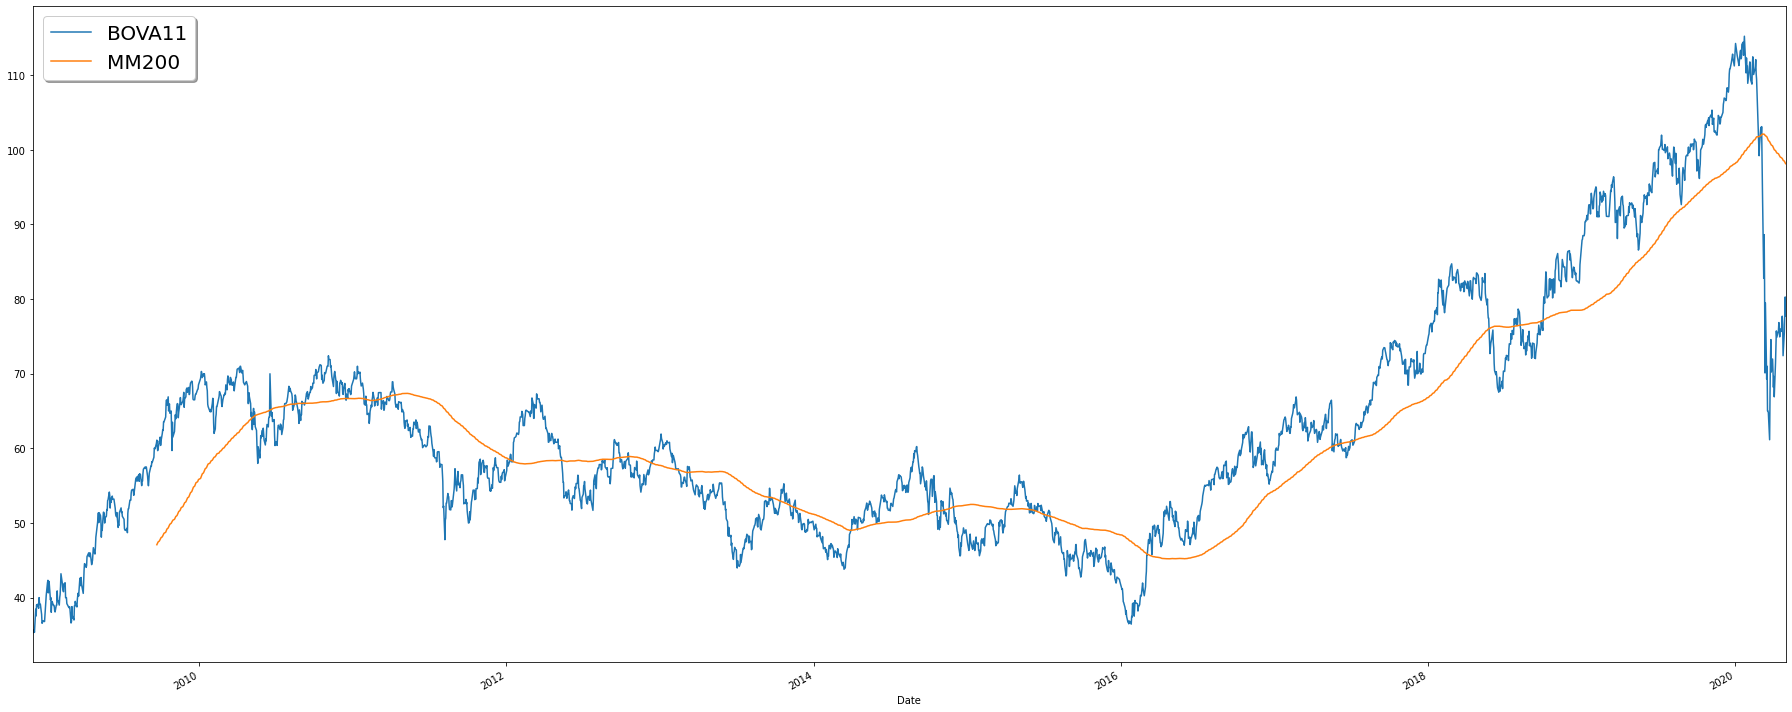

In [6]:
bova11["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova11["Adj Close"].rolling(200).mean().plot(label ="MM200")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

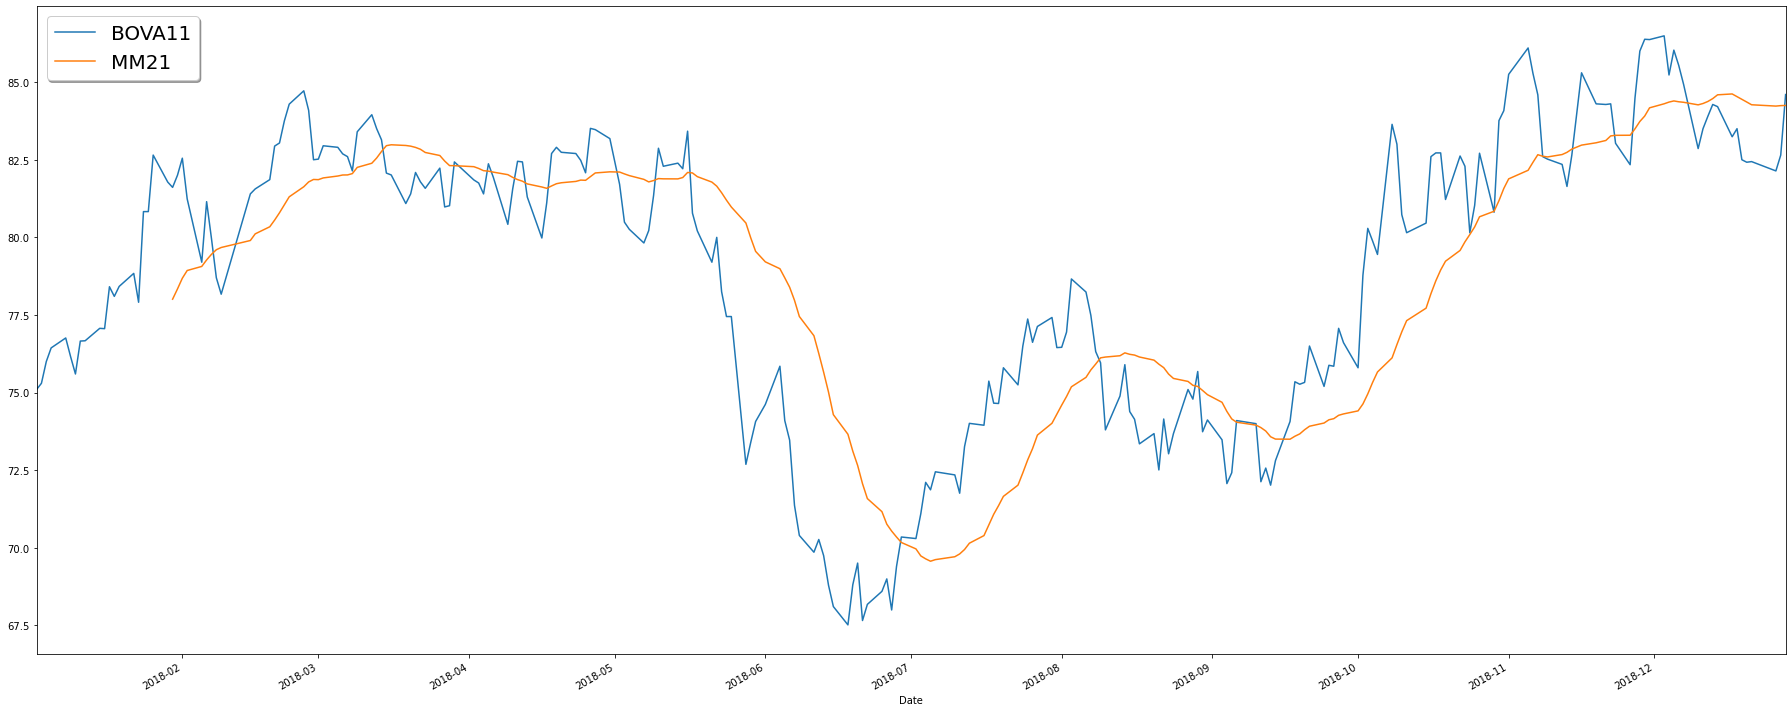

In [7]:
#selecionando um ano específico.
bova_fatiado = bova11[bova11.index.year==2018]
bova_fatiado["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova_fatiado["Adj Close"].rolling(21).mean().plot(label ="MM21")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

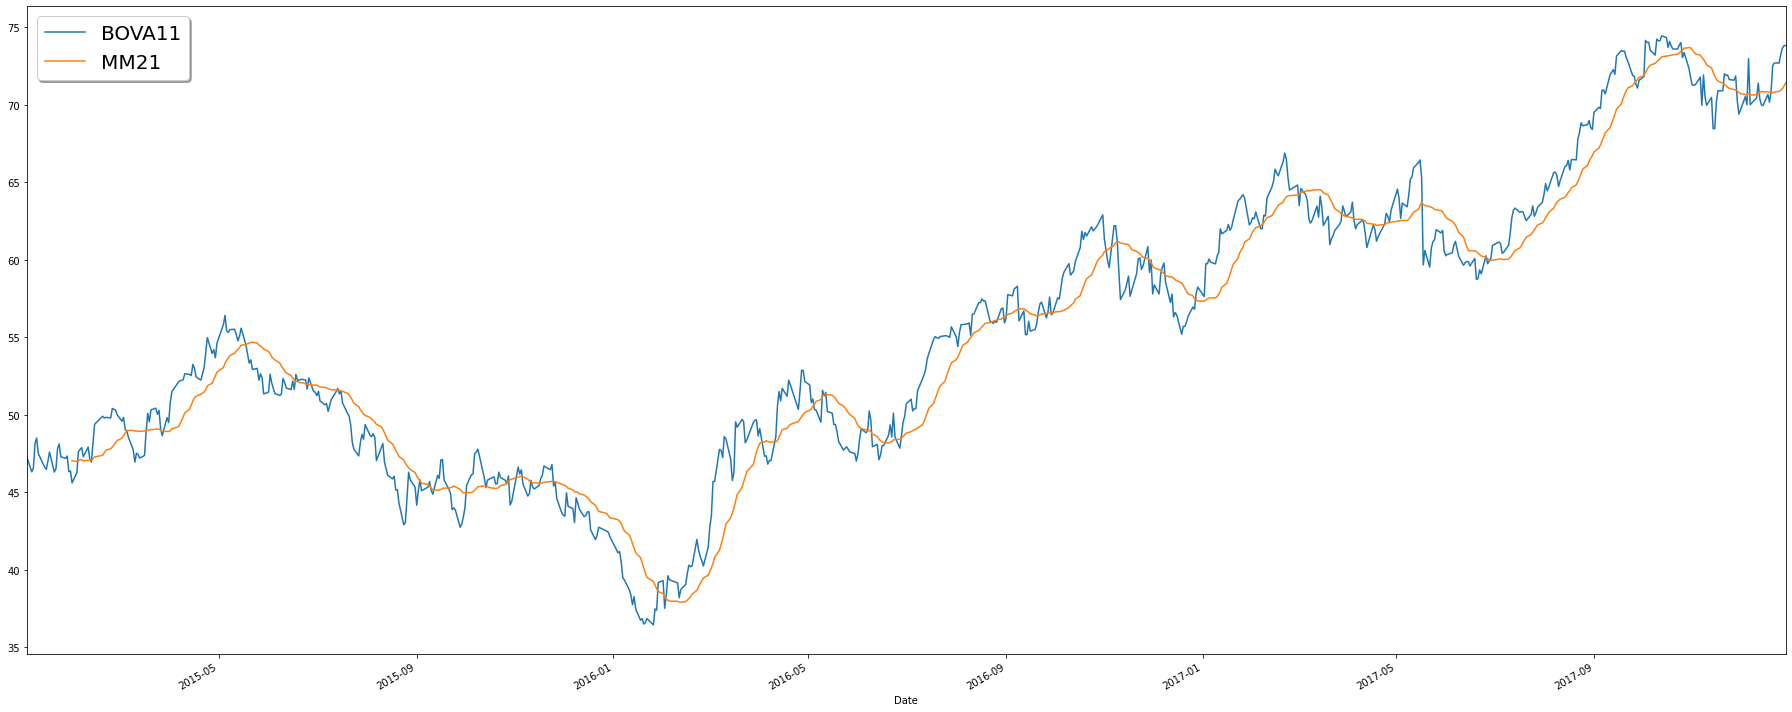

In [8]:
#selecionando um intervalo.
bova_fatiado = bova11[(bova11.index.year <= 2017) & (bova11.index.year>=2015)]
bova_fatiado["Adj Close"].plot(figsize=(25,10), label= "BOVA11")
bova_fatiado["Adj Close"].rolling(21).mean().plot(label ="MM21")
plt.legend(shadow=True, fontsize= 20, loc= "upper left")
plt.tight_layout();

In [9]:
#Com essa base eu consigo selecionar qualquer ano, mês e dia da minha base de dados.
bova_dez = bova11[(bova11.index.month == 12) & (bova11.index.day==11)]
bova_dez

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-12-11,39.369999,39.830002,38.660000,38.889999,38.889999,164200
2009-12-11,68.279999,68.940002,68.279999,68.730003,68.730003,242400
2012-12-11,58.110001,58.619999,57.810001,58.290001,58.290001,1440650
2013-12-11,49.849998,49.849998,48.810001,48.810001,48.810001,610110
2014-12-11,48.119999,48.619999,47.450001,48.369999,48.369999,1467050
2015-12-11,43.810001,44.619999,43.680000,43.919998,43.919998,3775130
2017-12-11,70.790001,70.930000,70.019997,70.440002,70.440002,2273950
2018-12-11,84.000000,84.400002,82.489998,83.500000,83.500000,4130900
2019-12-11,106.820000,107.000000,106.400002,106.750000,106.750000,4106850


#Correlação entre ativos

In [10]:
ativos = ["^BVSP", "USDBRL=X"]
carteira = wb.get_data_yahoo(ativos, start = "2007-01-01" )["Adj Close"]
carteira = carteira.dropna()

[*********************100%***********************]  2 of 2 completed


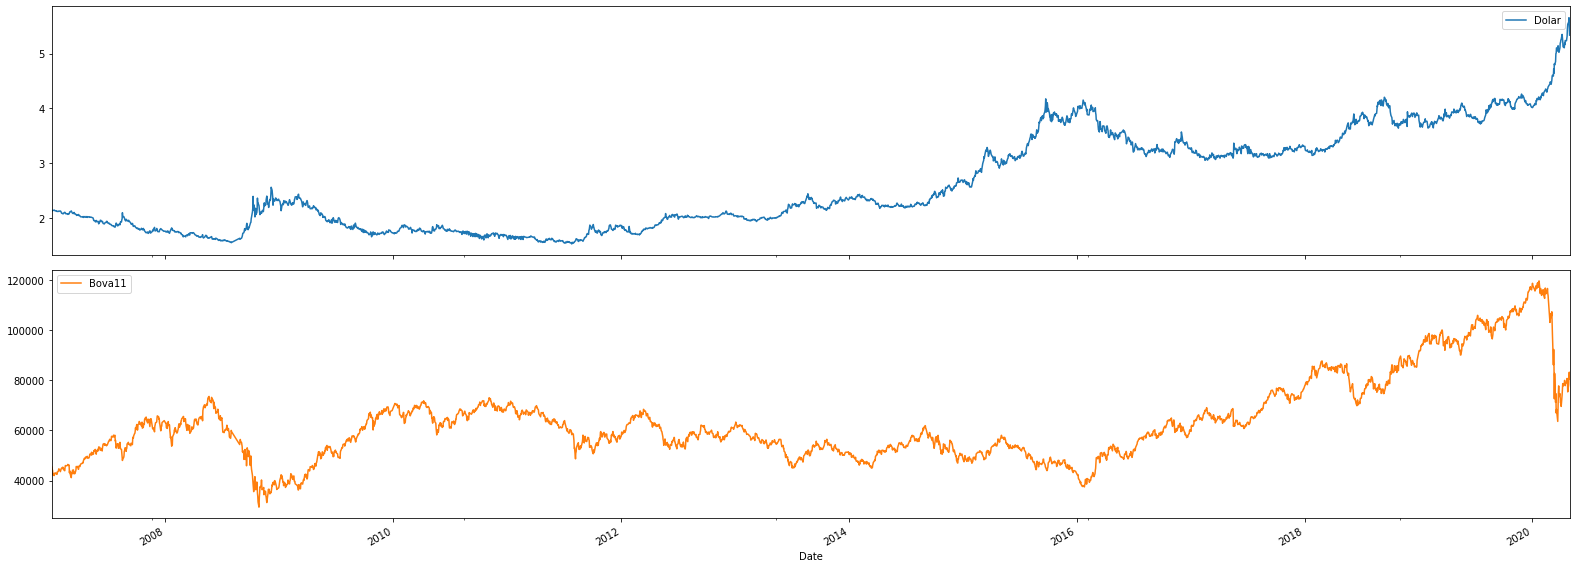

In [11]:
#plotando em gráficoa diferentes, pois os ativos estão em escalas diferentes.
carteira.columns = ["Dolar", "Bova11"]
carteira.plot(subplots=True, figsize=(22,8))
plt.tight_layout();

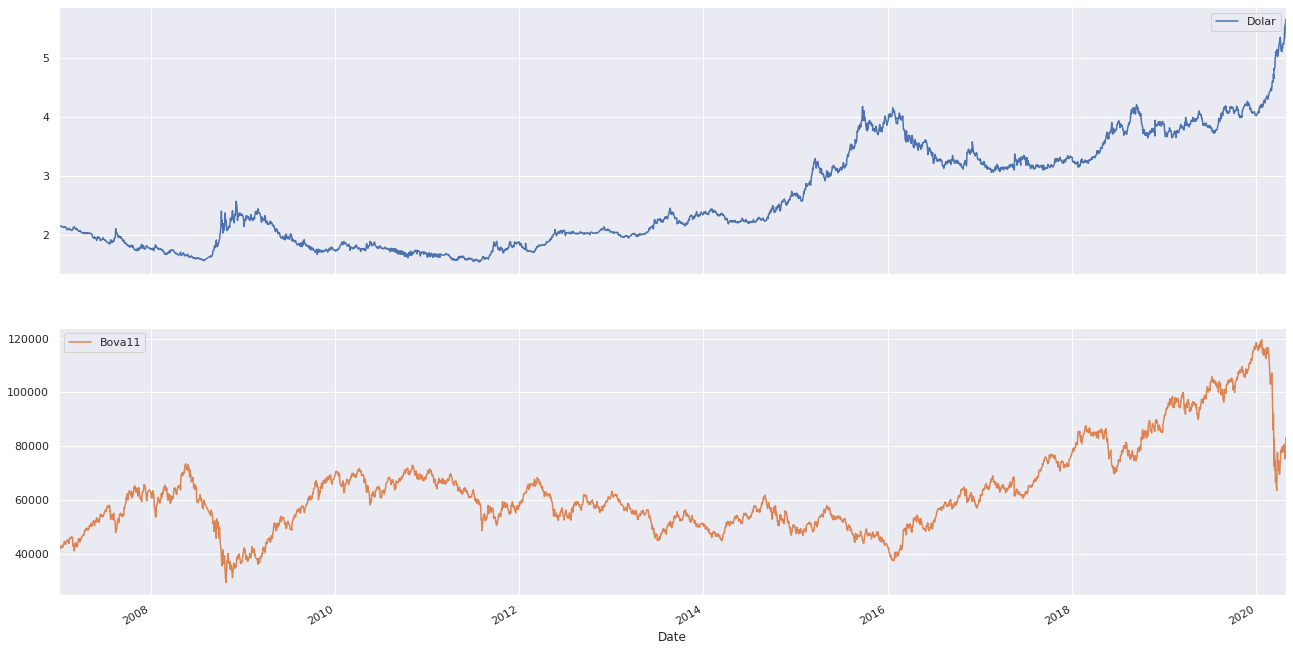

In [12]:
sns.set()
carteira.plot(subplots=True, figsize=(22,12))
plt.show();

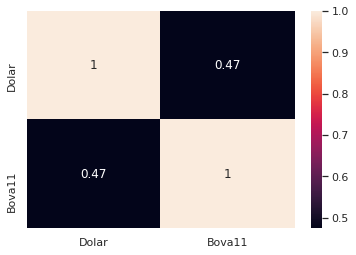

In [13]:
#Correlação entre Dolar e IBOV da minha Base inteira.
sns.heatmap(carteira.corr(), annot = True)
plt.show();

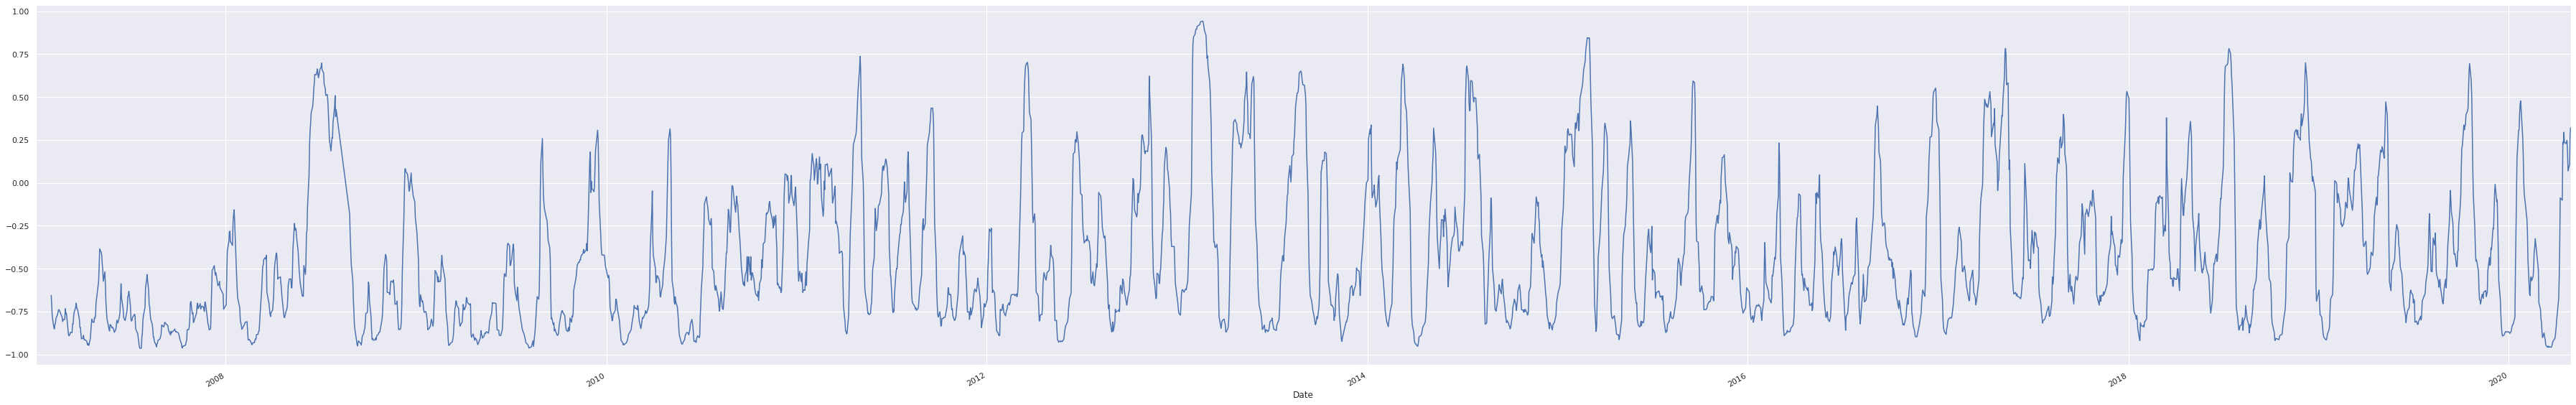

In [14]:
#Correlação entre o Dolar e Bova11 período de 21(mês) dias da minha base.
carteira["Dolar"].rolling(21).corr(carteira["Bova11"]).plot(figsize=(50,8))
plt.tight_layout();

In [0]:
carteira["bova11_dolarizado"] = carteira["Bova11"]/carteira["Dolar"]
bova_dolarizado = pd.DataFrame(carteira["bova11_dolarizado"])

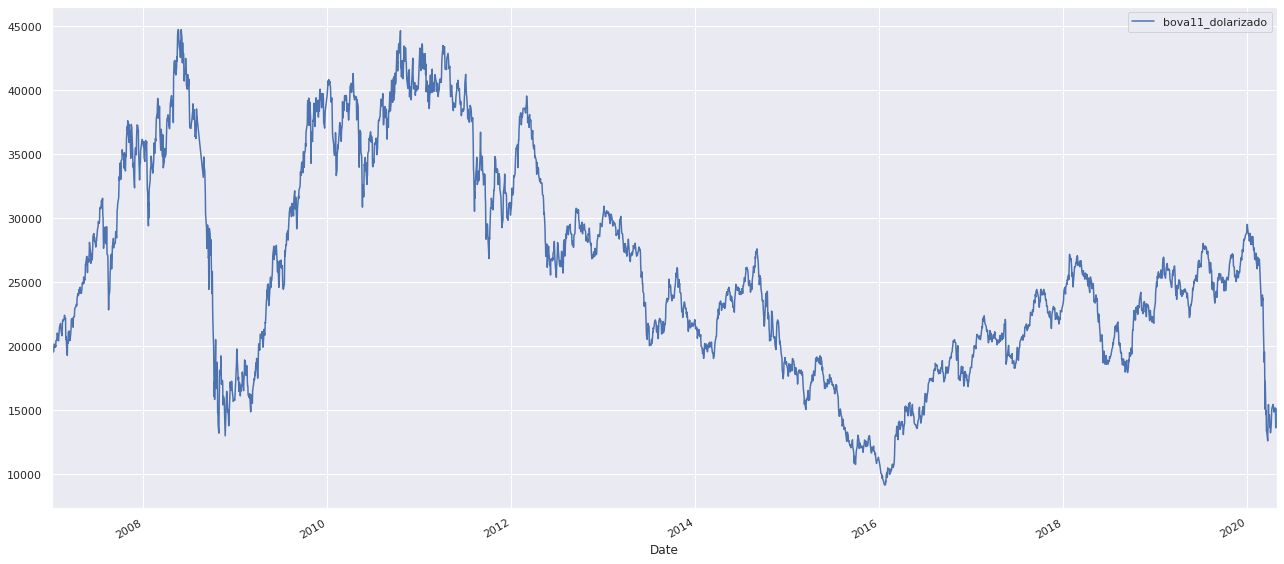

In [16]:
(pd.DataFrame(carteira["bova11_dolarizado"])).plot(figsize=(18,8))
plt.tight_layout();

In [0]:
#OBTENDO OS DADOS
tickers = ["ALPA4.SA",
            "AMAR3.SA",
            "AZUL4.SA",
            "B3SA3.SA",
            "BBAS3.SA",
            "BIDI4.SA",
            "BRML3.SA",
            "CEAB3.SA",
            "COGN3.SA",
            "EGIE3.SA",
            "ELET6.SA",
            "FLRY3.SA",
            "GNDI3.SA",
            "HAPV3.SA",
            "IGTA3.SA",
            "IRBR3.SA",
            "JBSS3.SA",
            "LAME4.SA",
            "LCAM3.SA",
            "MGLU3.SA",
            "MILS3.SA",
            "MOVI3.SA",
            "MRFG3.SA",
            "NTCO3.SA",
            "OIBR4.SA",
            "PETR3.SA",
            "RAPT4.SA",
            "SAPR11.SA",
            "SBSP3.SA",
            "SLCE3.SA",
            "SULA11.SA",
            "TUPY3.SA",
            "UGPA3.SA",
            "VALE3.SA",
            "VVAR3.SA",
            "WEGE3.SA",
            "WIZS3.SA"]

carteira = wb.get_data_yahoo(tickers, period="5y")["Adj Close"]

ibov = wb.get_data_yahoo("^BVSP", period="5y")["Adj Close"]
ibov

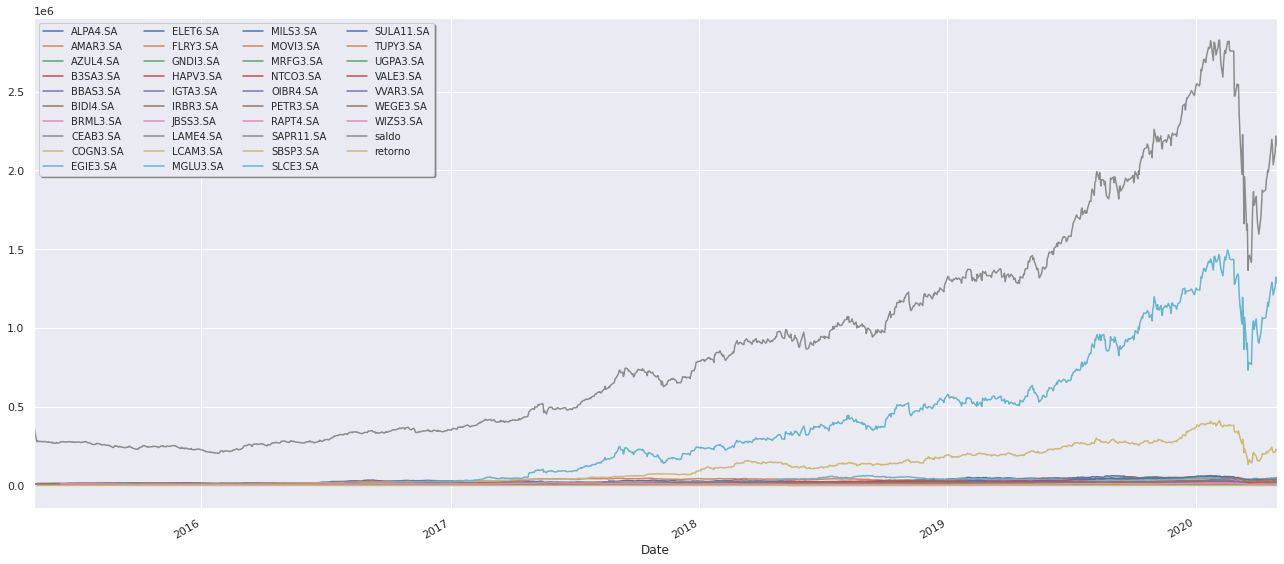

In [47]:
sns.set()
#carteira.sort_values(ascending=True)
carteira.plot(figsize=(18,8))
plt.legend(loc= "upeer left", shadow = True, ncol = 4, fontsize= "small")
plt.tight_layout();


In [0]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada

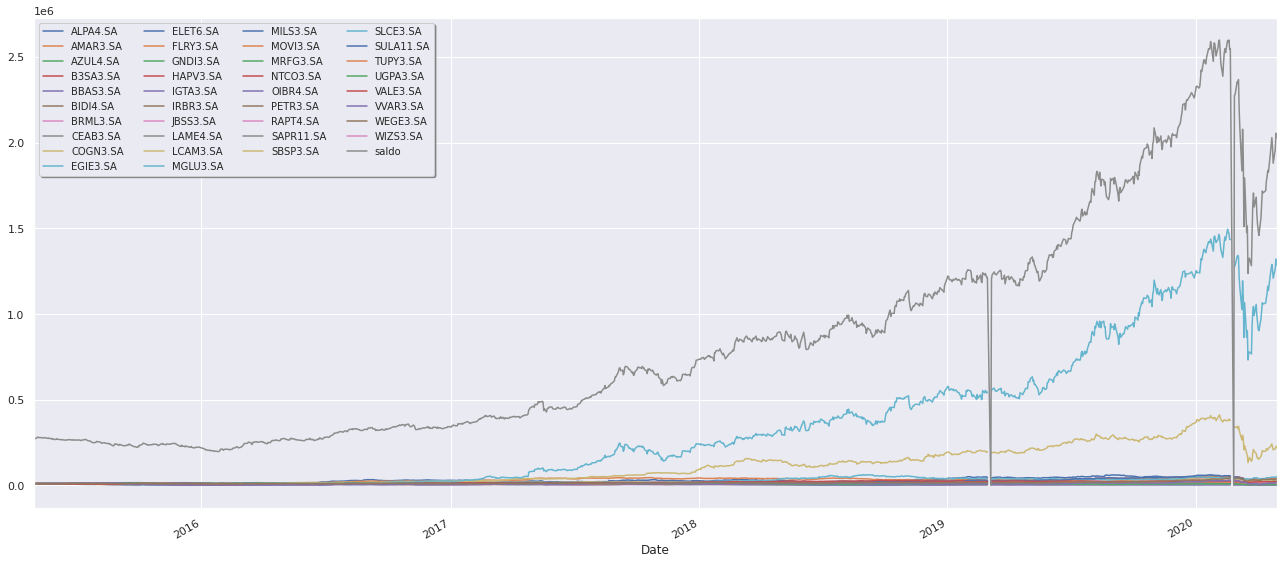

In [46]:
carteira_normalizada.plot(figsize=(18,8))
plt.legend(loc= "upeer left", shadow = True, ncol = 4, fontsize= "small")
plt.tight_layout();


In [0]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [0]:
carteira_normalizada

In [0]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

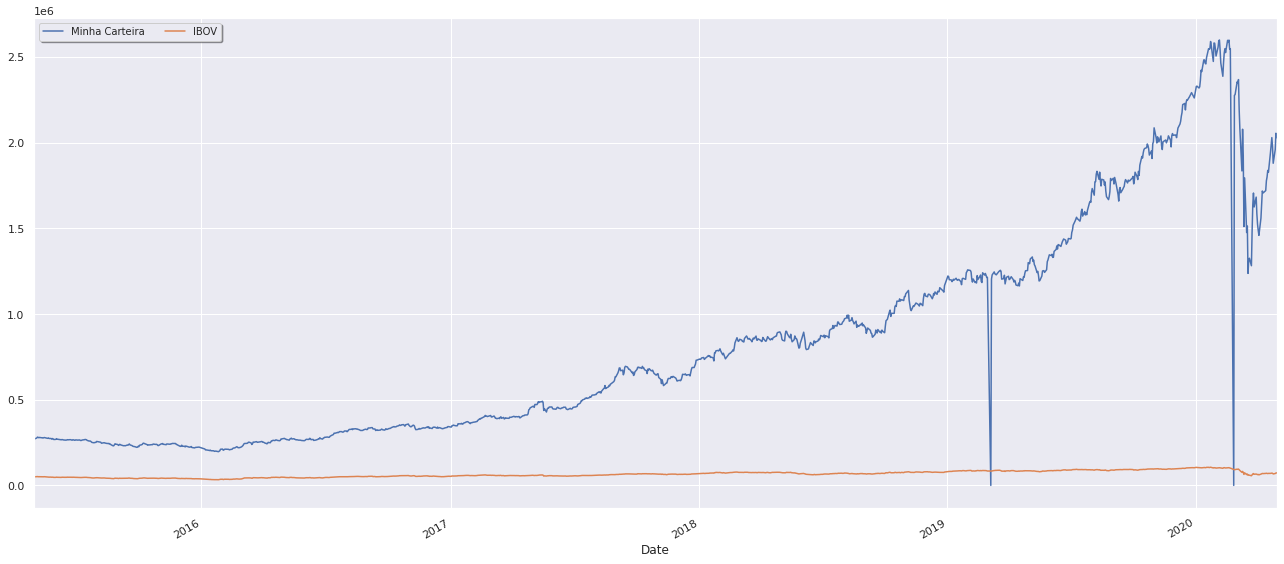

In [48]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend(loc= "upeer left", shadow = True, ncol = 4, fontsize= "small")
plt.tight_layout();

 "B3SA3.SA",
            "BBAS3.SA",
            "BIDI4.SA",
            "BRML3.SA",
            "CEAB3.SA",
            "COGN3.SA",
            "EGIE3.SA",
            "ELET6.SA",
            "FLRY3.SA",
            "GNDI3.SA",
            "HAPV3.SA",
            "IGTA3.SA",
            "IRBR3.SA",
            "JBSS3.SA",
            "LAME4.SA",
            "LCAM3.SA",
            "MGLU3.SA",
            "MILS3.SA",
            "MOVI3.SA",
            "MRFG3.SA",
            "NTCO3.SA",
            "OIBR4.SA",
            "PETR3.SA",
            "RAPT4.SA",
            "SAPR11.SA",
            "SBSP3.SA",
            "SLCE3.SA",
            "SULA11.SA",
            "TUPY3.SA",
            "UGPA3.SA",
            "VALE3.SA",
            "VVAR3.SA",
            "WEGE3.SA",
            "WIZS3.SA"

In [49]:
tickers = ["ALPA4.SA",
            "AMAR3.SA",
            "AZUL4.SA"]
  
dados_yahoo = wb.get_data_yahoo(tickers, period="5y")["Adj Close"]

#tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
#dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [50]:
bova = ["BOVA11.SA"]

dados_bova = wb.get_data_yahoo(bova, period="5y")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [51]:
retorno_bova = dados_bova.pct_change()
retorno_bova

Date
2015-04-30         NaN
2015-05-04    0.022153
2015-05-05    0.010568
2015-05-06   -0.017547
2015-05-07   -0.001984
                ...   
2020-04-24   -0.055316
2020-04-27    0.043226
2020-04-28    0.034286
2020-04-29    0.027518
2020-04-30   -0.031639
Name: Adj Close, Length: 1242, dtype: float64

In [52]:
dados_yahoo

,ALPA4.SA,AMAR3.SA,AZUL4.SA
Date,,,
2015-04-30,6.900177,13.2909,NaN
2015-05-04,7.331873,13.3636,NaN
2015-05-05,7.032471,13.0273,NaN
2015-05-06,7.067286,12.6182,NaN
2015-05-07,6.990695,12.4727,NaN
...,...,...,...
2020-04-24,26.459999,5.9000,13.990000
2020-04-27,27.030001,5.8600,14.110000
2020-04-28,28.570000,6.3800,16.049999


In [53]:
retorno = dados_yahoo.pct_change()
retorno

,ALPA4.SA,AMAR3.SA,AZUL4.SA
Date,,,
2015-04-30,NaN,NaN,NaN
2015-05-04,0.062563,0.005470,NaN
2015-05-05,-0.040836,-0.025165,NaN
2015-05-06,0.004951,-0.031403,NaN
2015-05-07,-0.010838,-0.011531,NaN
...,...,...,...
2020-04-24,-0.025773,-0.048387,-0.145388
2020-04-27,0.021542,-0.006780,0.008578
2020-04-28,0.056974,0.088737,0.137491


In [54]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ALPA4.SA,AMAR3.SA,AZUL4.SA
Date,,,
2015-04-30,1.000000,1.000000,1.000000
2015-05-04,1.062563,1.005470,NaN
2015-05-05,1.019172,0.980167,NaN
2015-05-06,1.024218,0.949386,NaN
2015-05-07,1.013118,0.938439,NaN
...,...,...,...
2020-04-24,3.834684,0.443913,0.624554
2020-04-27,3.917291,0.440903,0.629911
2020-04-28,4.140473,0.480028,0.716518


In [58]:
carteira = [100,200,300,] * retorno_acumulado
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ALPA4.SA,AMAR3.SA,AZUL4.SA,saldo,retorno
Date,,,,,
2015-04-30,100.000000,200.000000,300.000000,600.000000,NaN
2015-05-04,106.256302,201.093975,NaN,307.350277,-0.487750
2015-05-05,101.917244,196.033371,NaN,297.950615,-0.030583
2015-05-06,102.421807,189.877286,NaN,292.299093,-0.018968
2015-05-07,101.311807,187.687815,NaN,288.999622,-0.011288
...,...,...,...,...,...
2020-04-24,383.468384,88.782550,187.366072,659.617006,-0.065898
2020-04-27,391.729065,88.180635,188.973213,668.882913,0.014047
2020-04-28,414.047317,96.005538,214.955351,725.008205,0.083909


Start date,2015-04-30
End date,2020-04-30
Total months,59
,Backtest
Annual return,4.0%
Cumulative returns,21.3%
Annual volatility,73.5%
Sharpe ratio,0.35
Calmar ratio,0.05
Stability,0.82
Max drawdown,-77.2%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,77.23,2015-04-30,2016-01-07,2017-05-02,524
1,71.32,2020-01-28,2020-03-18,NaT,NaN
2,41.88,2018-03-12,2018-07-02,2019-01-31,234
3,16.02,2017-05-17,2017-05-22,2017-07-28,53
4,14.59,2019-03-18,2019-04-17,2019-06-06,59


Stress Events,mean,min,max
Fall2015,-0.34%,-3.97%,3.26%
New Normal,0.10%,-48.77%,123.81%


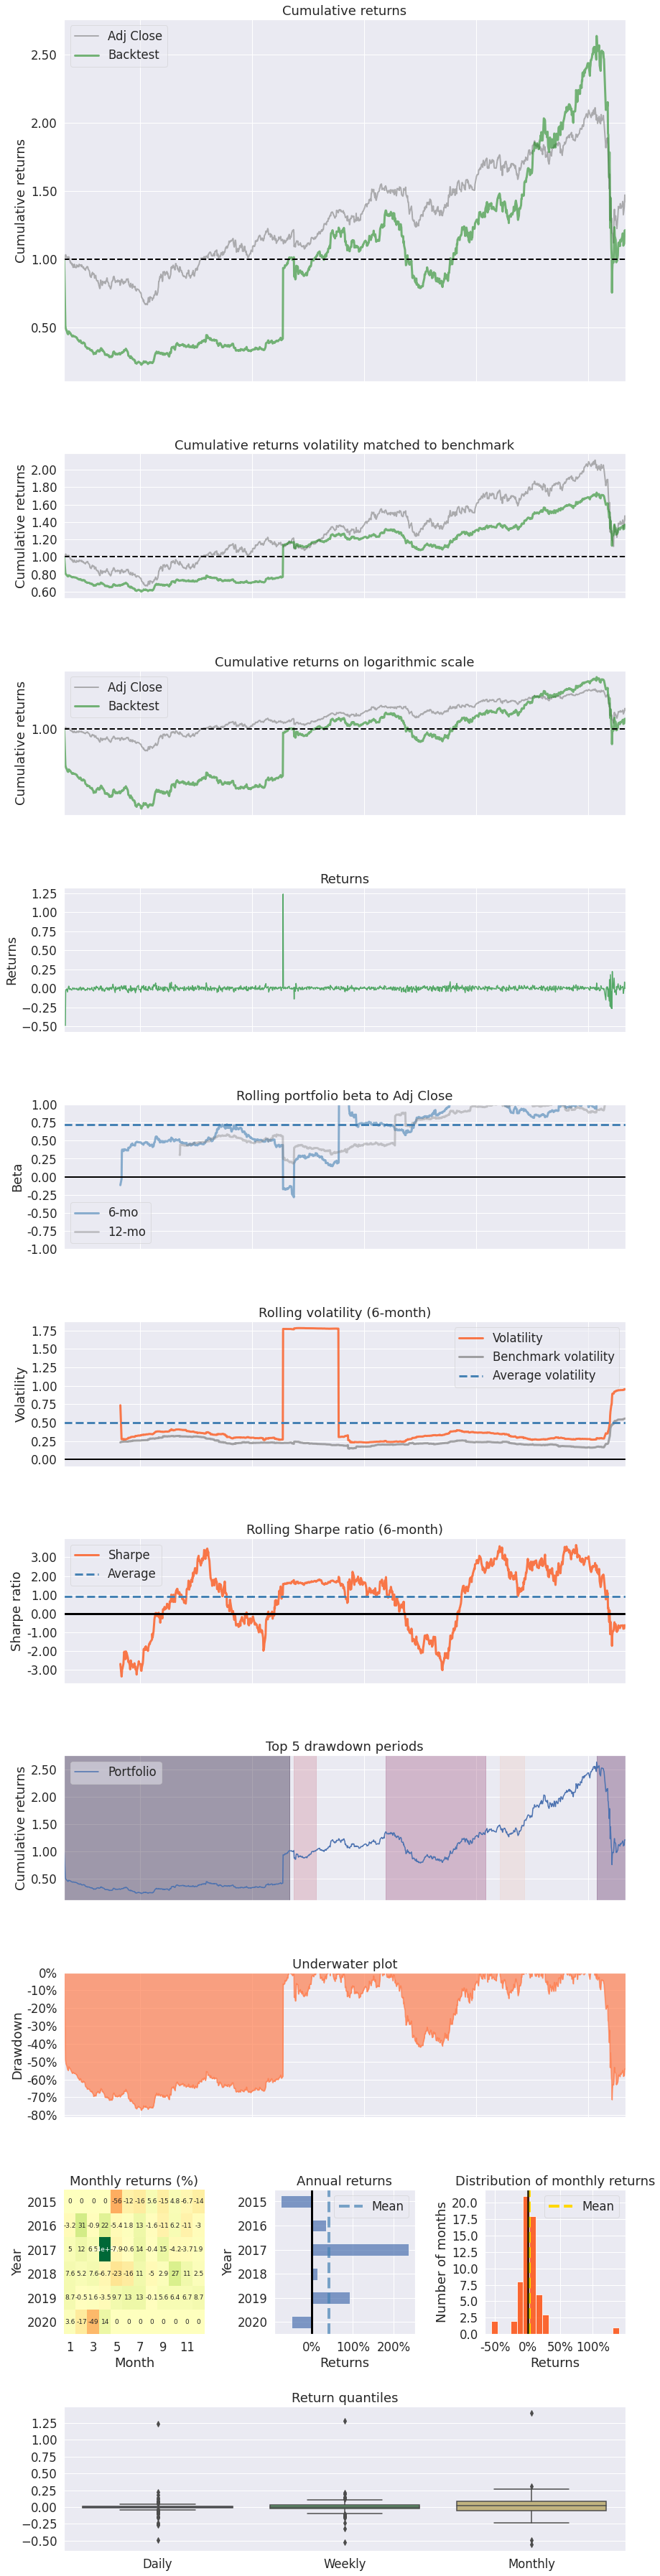

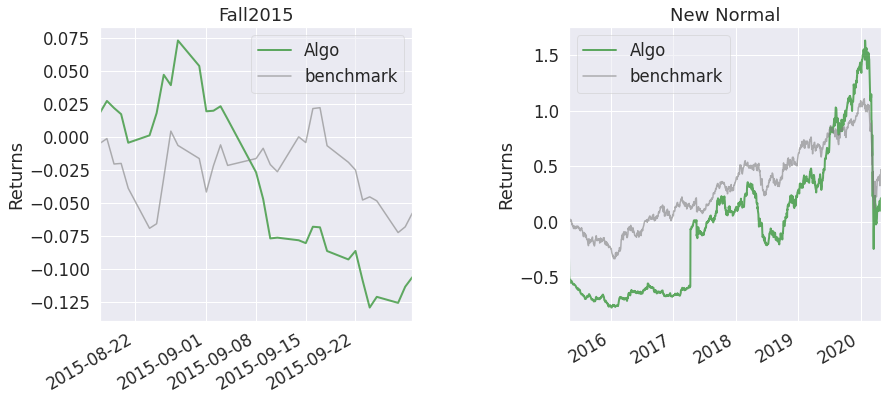

In [59]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno_bova)


(0.1, 1.4)

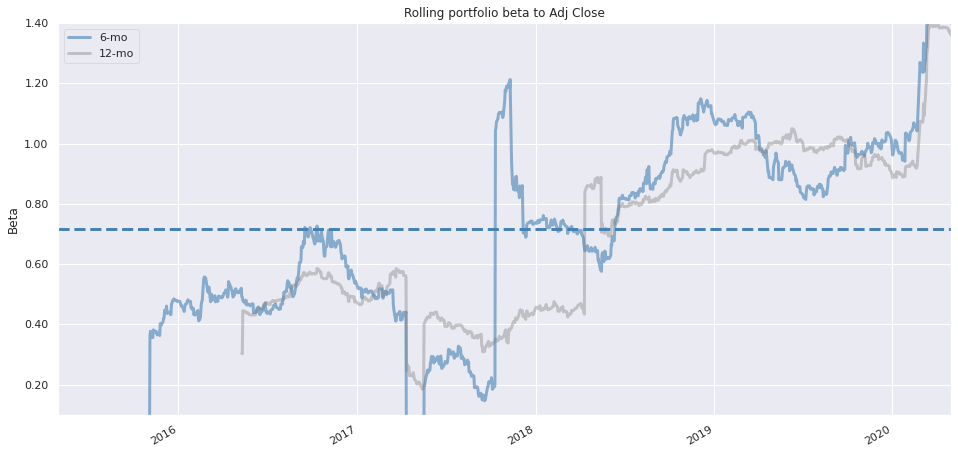

In [60]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno_bova, ax=ax1)
plt.ylim((0.1, 1.4))